### 포트폴리오 


시각화 전략
- 시각화 목표: 코로나와 범죄자의 상관관계
- 시각화의 범위: 전국 (2018~2021)
- 시각화의 개발절차: kosis.kr 에서 데이터 확보, 분석 후 시각화

시각화 요구사항
- 사용자의 수준과 취향/ 목적: 범죄자와 코로나의 상관관계를 알고 싶은 대학교수
- 시나리오/스토리보드 개발: 코로나 전에 비해 코로나 기간 중 폭발적 감소세 보임, 코로나 이후 급격한 감소세, 이전보다는 많은것이 사실이나 범죄률이 대폭 증가

데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용: 년도별 linepict, 시기별 중형 이륜차 비율, 눈으로 표기확인 용이할 경우 숫자 표시 하지 않음

시각화 명세서 기반 설계
- 시각화 UI 설계: 상단 절반 년도별 llineplot. 하단 3등분하여 코로나 이전, 코로나 기간, 코로나 이후 크기별 비율 pie chart.



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\HMFMMUEX.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()


matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('범죄자_연령_20230313154500.csv', encoding='cp949', header=0)
pd_data.head()
# print(pd_data.shape)

# print(pd_data['범행연령별(1)'])
# print(pd_data.dtypes)





,범죄별(1),범죄별(2),범행연령별(1),범행연령별(2),2018,2019,2020,2021
0,합계,소계,계,소계,1749459,1754808,1638387,1359952
1,합계,소계,소년,소계,66142,66247,64480,54017
2,합계,소계,소년,14세,8321,9053,9124,8091
3,합계,소계,소년,15세,11595,11730,11956,10301
4,합계,소계,소년,16세,13306,13548,13578,11594


In [29]:
#범행 연령 성인과 소년으로 그룹바이 
c = pd_data.groupby(['범행연령별(1)'])
df_group = c.mean()

print(df_group)


Empty DataFrame
Columns: []
Index: [계, 성인, 소년]


C:\Users\ITPS\AppData\Local\Temp\ipykernel_10868\1499741916.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = c.mean()


In [59]:
#(-)처리 후 형변환하고 sum 사용, 년도별로 묶어줌 

total=pd_data[['범행연령별(1)', '2018', '2019', '2020', '2021']]
t =total.set_index('범행연령별(1)').stack().replace('-', 0).astype('int64').reset_index()
print(t)
t.groupby(['level_1','범행연령별(1)']).sum()

    범행연령별(1) level_1        0
0          계    2018  1749459
1          계    2019  1754808
2          계    2020  1638387
3          계    2021  1359952
4         소년    2018    66142
..       ...     ...      ...
955       성인    2021    79981
956       성인    2018    23347
957       성인    2019    26644
958       성인    2020    26457
959       성인    2021    23471

[960 rows x 3 columns]


0
level_1 범행연령별(1)         
2018    계         4035138
        성인        7528816
        소년         319984
2019    계         4048126
        성인        7624734
        소년         318364
2020    계         3774223
        성인        7043264
        소년         302148
2021    계         3131025
        성인        5879956
        소년         257274

ValueError: could not convert string to float: '소계'

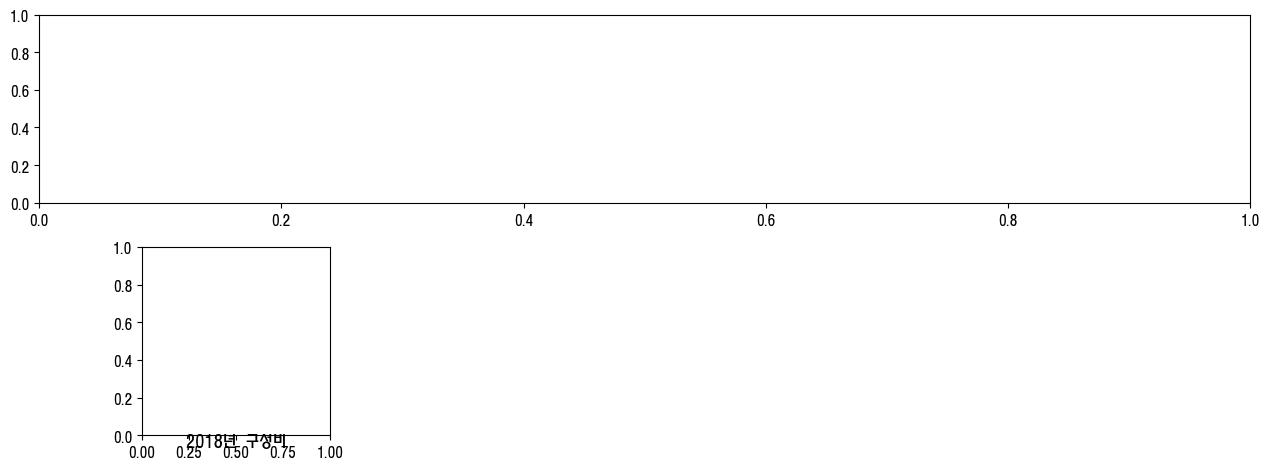

In [64]:
fig = plt.figure(layout='tight', figsize=(6.4*2, 4.8)) 
line_axe = fig.add_subplot(2,1,1)

pie2018_axe = fig.add_subplot(2,3,4)
pie2018_axe.set_title('2018년 범죄률', y=-0.1)
pie2018_axe.pie(pd_data.iloc[0, 1:])

# pie2019_axe = fig.add_subplot(2,3,4)
# pie2019_axe.set_title('2019년 구성비', y=-0.1)
# pie2019_axe.pie(pd_data.iloc[0, 1:])


# pie2020_axe = fig.add_subplot(2,3,4)
# pie2020_axe.set_title('2020년 구성비', y=-0.1).

# pie2020_axe.pie(pd_data.iloc[0, 1:])


# pie2021_axe = fig.add_subplot(2,3,5)
# pie2021_axe.set_title('2021년 구성비', y=-0.3)
# pie2021_axe.pie(pd_data.iloc[-1, 1:])
# pie2021_axe.pie(pd_data.iloc[-1, 1:], labels=list('abc'), autopct='%.2f', shadow=True, radius=1.5)

# fig.legend(loc ='lower right')